In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color="Blue"> Loading the data set </font>

In [2]:
df=pd.read_csv('equip_failures_training_set.csv')

### <font color="blue"> Displaying the first five observations of the data set </font>


In [3]:
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df.shape

(60000, 172)

### <font color="blue"> The data has 172 sensor columns

In [5]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

In [6]:
df.columns

Index(['id', 'target', 'sensor1_measure', 'sensor2_measure', 'sensor3_measure',
       'sensor4_measure', 'sensor5_measure', 'sensor6_measure',
       'sensor7_histogram_bin0', 'sensor7_histogram_bin1',
       ...
       'sensor105_histogram_bin2', 'sensor105_histogram_bin3',
       'sensor105_histogram_bin4', 'sensor105_histogram_bin5',
       'sensor105_histogram_bin6', 'sensor105_histogram_bin7',
       'sensor105_histogram_bin8', 'sensor105_histogram_bin9',
       'sensor106_measure', 'sensor107_measure'],
      dtype='object', length=172)

### <font color="blue"> countplot for target variable 


Text(0, 0.5, 'Number of Records')

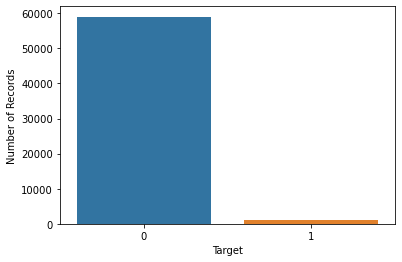

In [7]:
sns.countplot(x='target', data = df)
plt.xlabel('Target')
plt.ylabel('Number of Records')

### <font color="blue">  we can see that we have imbalanced data for the target variable  . 

### <font color="blue"> Here we use F1 score metric instead of accuracy.

## <font color="Red"> Exploratory Data Analysis[EDA]

In [8]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

### <font color="blue">  to convert the data type into float we should handle missing values first

### <font color="blue"> checking and Treating  missing values 

In [9]:
df.isna().sum()

id                          0
target                      0
sensor1_measure             0
sensor2_measure             0
sensor3_measure             0
                           ..
sensor105_histogram_bin7    0
sensor105_histogram_bin8    0
sensor105_histogram_bin9    0
sensor106_measure           0
sensor107_measure           0
Length: 172, dtype: int64

### <font color="blue"> Replacing string 'na' with NaN values

In [10]:
df = df.replace('na',np.nan)

In [11]:
df.isna().sum()

id                              0
target                          0
sensor1_measure                 0
sensor2_measure             46329
sensor3_measure              3335
                            ...  
sensor105_histogram_bin7      671
sensor105_histogram_bin8      671
sensor105_histogram_bin9      671
sensor106_measure            2724
sensor107_measure            2723
Length: 172, dtype: int64

### <font color="blue"> Visual representation of missing ratio percentage

In [12]:
def plot_null(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

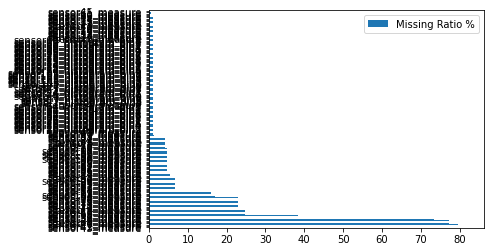

In [13]:
plot_null(df)
plot_width, plot_height = (60,35)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [14]:
df_null=df.isnull().sum() / len(df) * 100
df_null.sort_values(ascending=False)[:15]

sensor43_measure    82.106667
sensor42_measure    81.203333
sensor41_measure    79.566667
sensor40_measure    77.221667
sensor68_measure    77.215000
sensor2_measure     77.215000
sensor39_measure    73.348333
sensor38_measure    65.915000
sensor37_measure    45.461667
sensor36_measure    38.390000
sensor56_measure    24.768333
sensor57_measure    24.768333
sensor58_measure    24.768333
sensor65_measure    24.768333
sensor4_measure     24.768333
dtype: float64

### <font color="blue"> Removing columns which mostly have null values - more than 50%

In [15]:
df.drop(columns=['sensor43_measure', 'sensor42_measure', 'sensor41_measure', 'sensor40_measure', 'sensor68_measure','sensor2_measure','sensor39_measure', 'sensor38_measure', ], axis=1, inplace = True)

In [16]:
df.shape

(60000, 164)

### <font color="blue"> Replacing NaN with median values

### <font color="indigo">  Since most of the obeservations in each sensor measure is close to 0 and rest of the observations have an extremely high value, imputing missing values using mean would result in incorrect high values. Hence we choose to impute the missing values using the median of each column

### <font color="indigo"> For most of the features, the percentage of NULL values are in the range of 0% to 20 % of their data
### <font color="indigo"> A very small majority of the features have NULL values in the percentage of 50% to 80% of their data.
### <font color="indigo"> These features might be redundant or do not have much information which might contribute towards the training of the model.
### <font color="indigo"> Those features can be dropped during the data preprocessing stage.

In [17]:
for col in df.columns:
    if col not in ['id','target']:
        df[col] = df[col].fillna(df[col].median())

In [18]:
plot_null(df)

No NAs found


### <font color="blue"> Converting all measures to numerical data type 

In [19]:
for col in df.columns:
    if col not in ['id', 'target']:
        df[col] = df[col].astype(np.float)

In [20]:
df.dtypes

id                            int64
target                        int64
sensor1_measure             float64
sensor3_measure             float64
sensor4_measure             float64
                             ...   
sensor105_histogram_bin7    float64
sensor105_histogram_bin8    float64
sensor105_histogram_bin9    float64
sensor106_measure           float64
sensor107_measure           float64
Length: 164, dtype: object

### <font color="blue"> Checking the columns which have less than 3 unique values across the data set because columns with constant values do not support our model's prediction

### <font color="indigo"> Checking for unique values in each column in full dataset

<Figure size 12960x720 with 0 Axes>

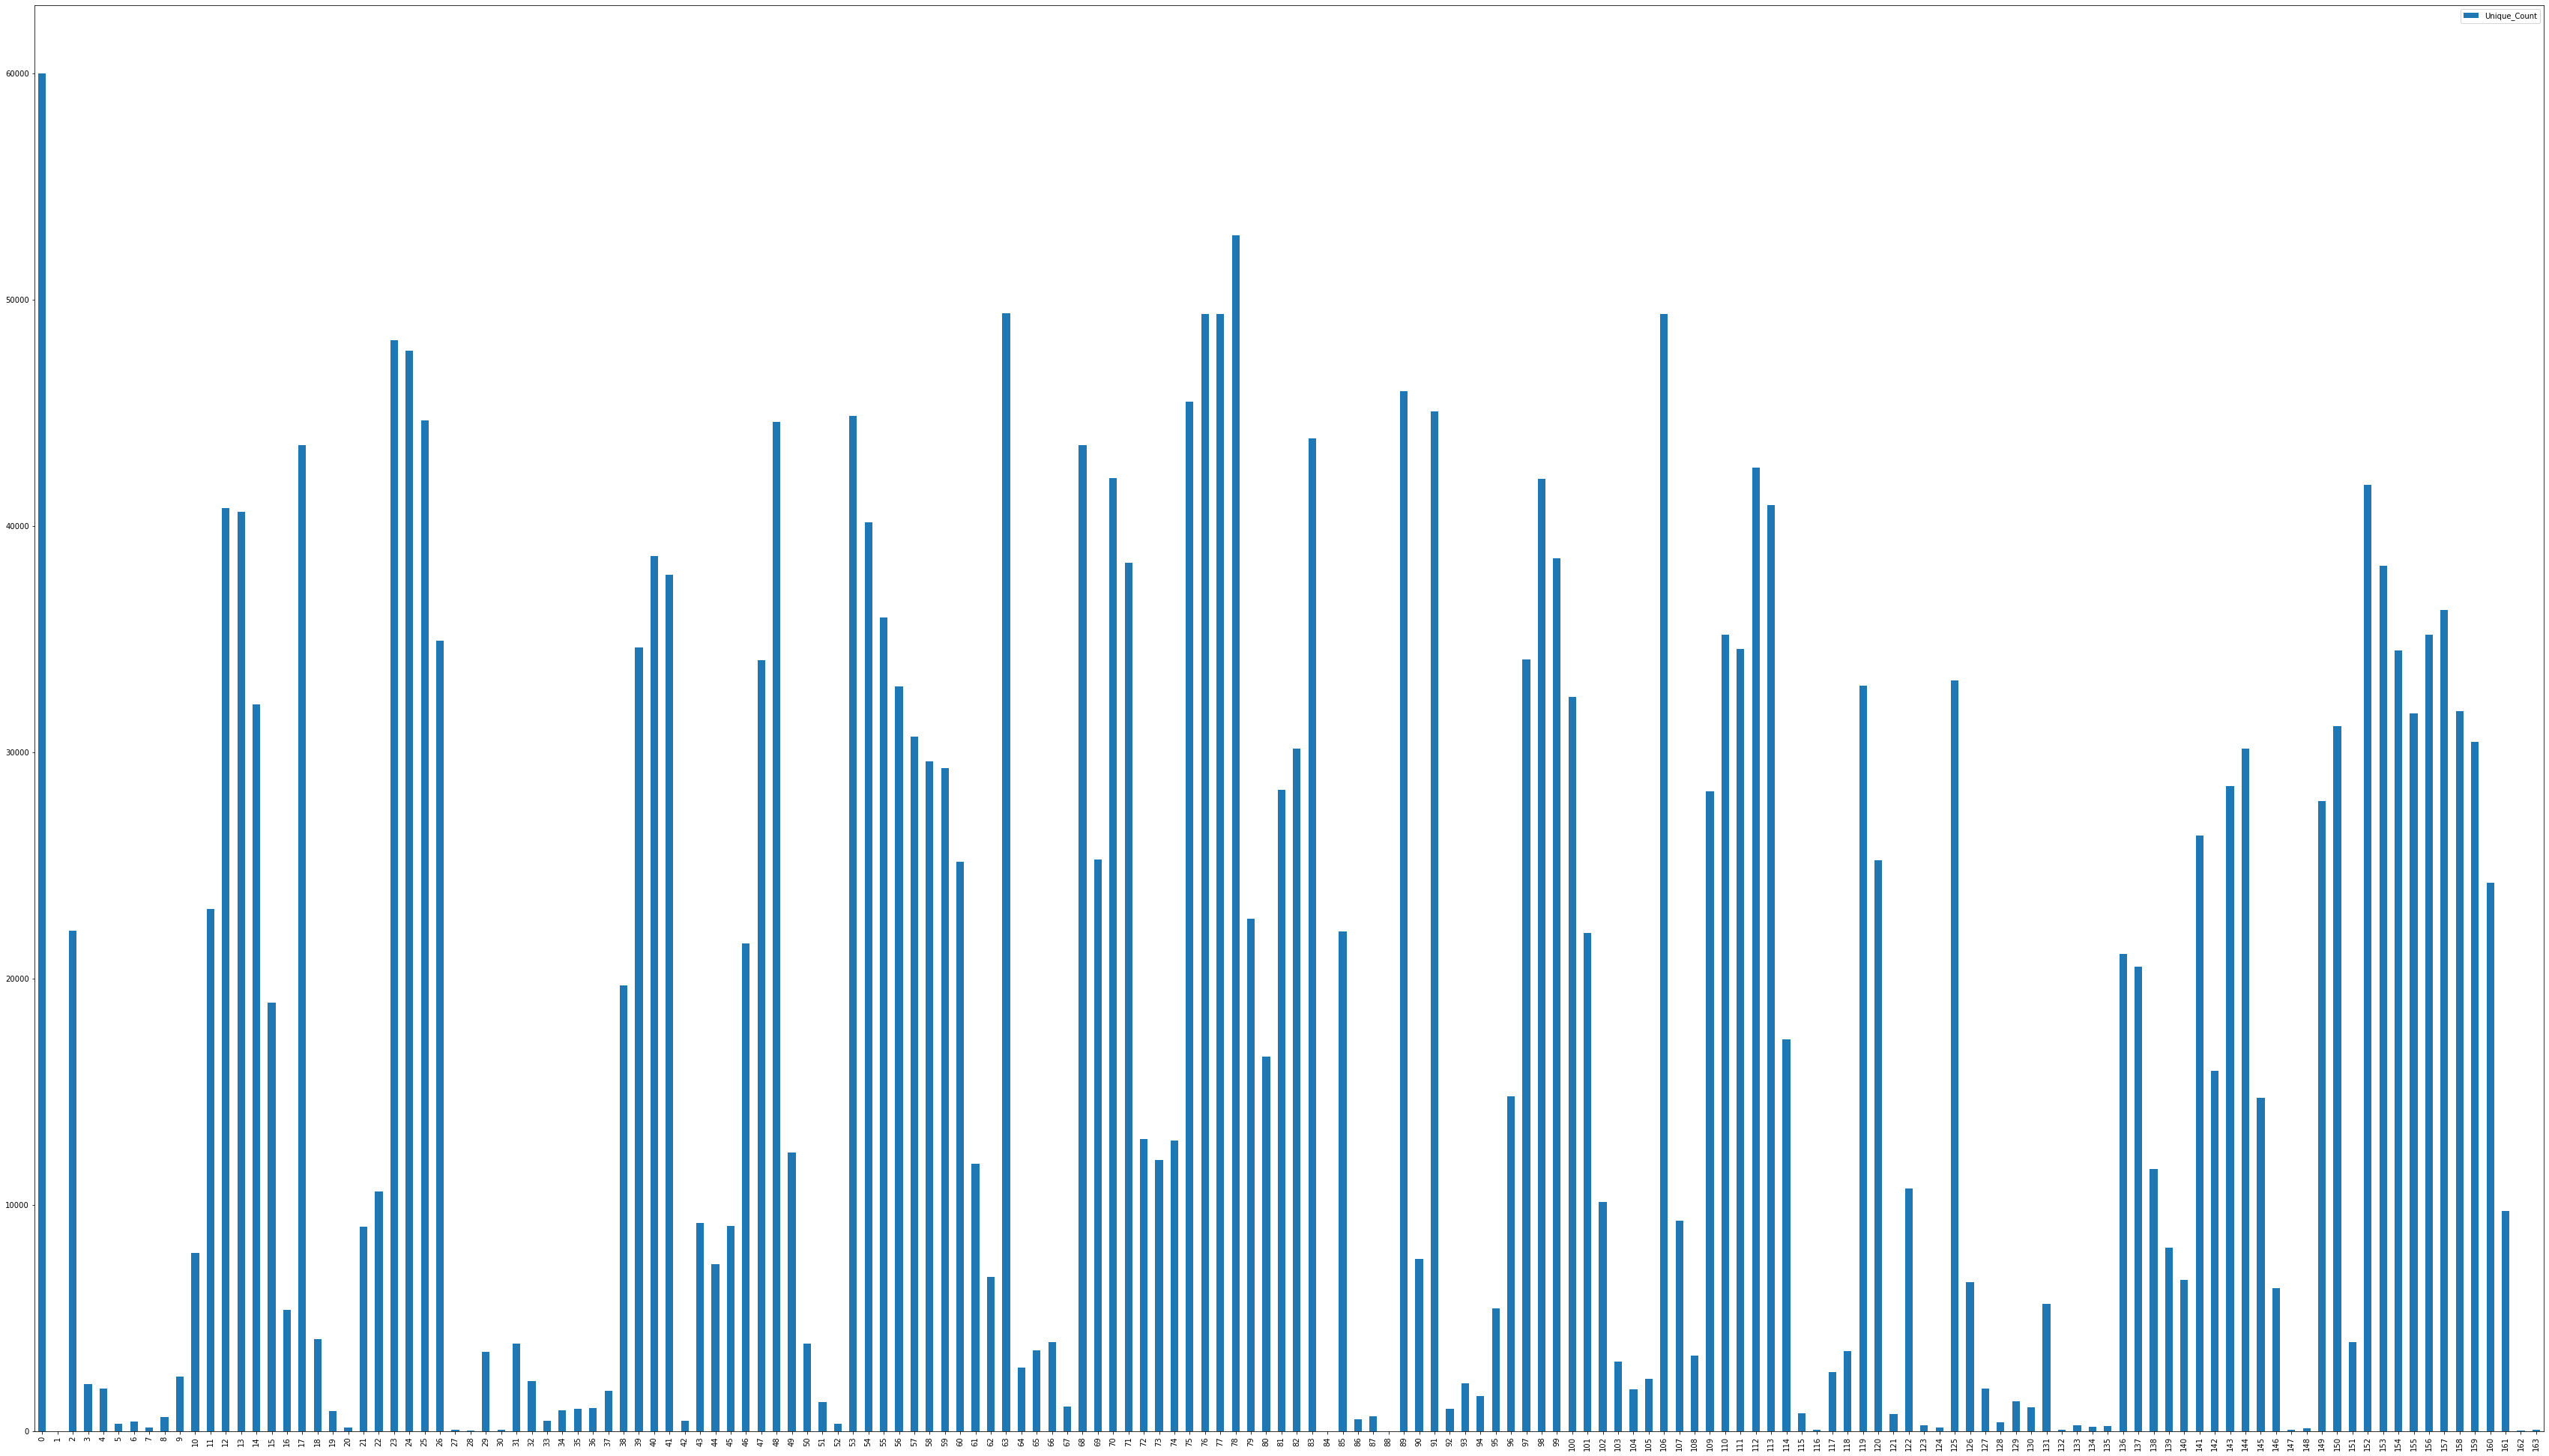

In [21]:
unique_data = df.nunique().reset_index()
unique_data.columns = ['Name','Unique_Count']
plt.figure (figsize = (180,10))
unique_data.plot(kind='bar')
plot_width, plot_height = (16,28)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [22]:
unique_data

,Name,Unique_Count
0,id,60000
1,target,2
2,sensor1_measure,22095
3,sensor3_measure,2061
4,sensor4_measure,1886
...,...,...
159,sensor105_histogram_bin7,30469
160,sensor105_histogram_bin8,24213
161,sensor105_histogram_bin9,9724
162,sensor106_measure,28


### <font color="blue"> Checking the columns which have less than 3 unique values across the data set because columns with constant values do not support our model's prediction

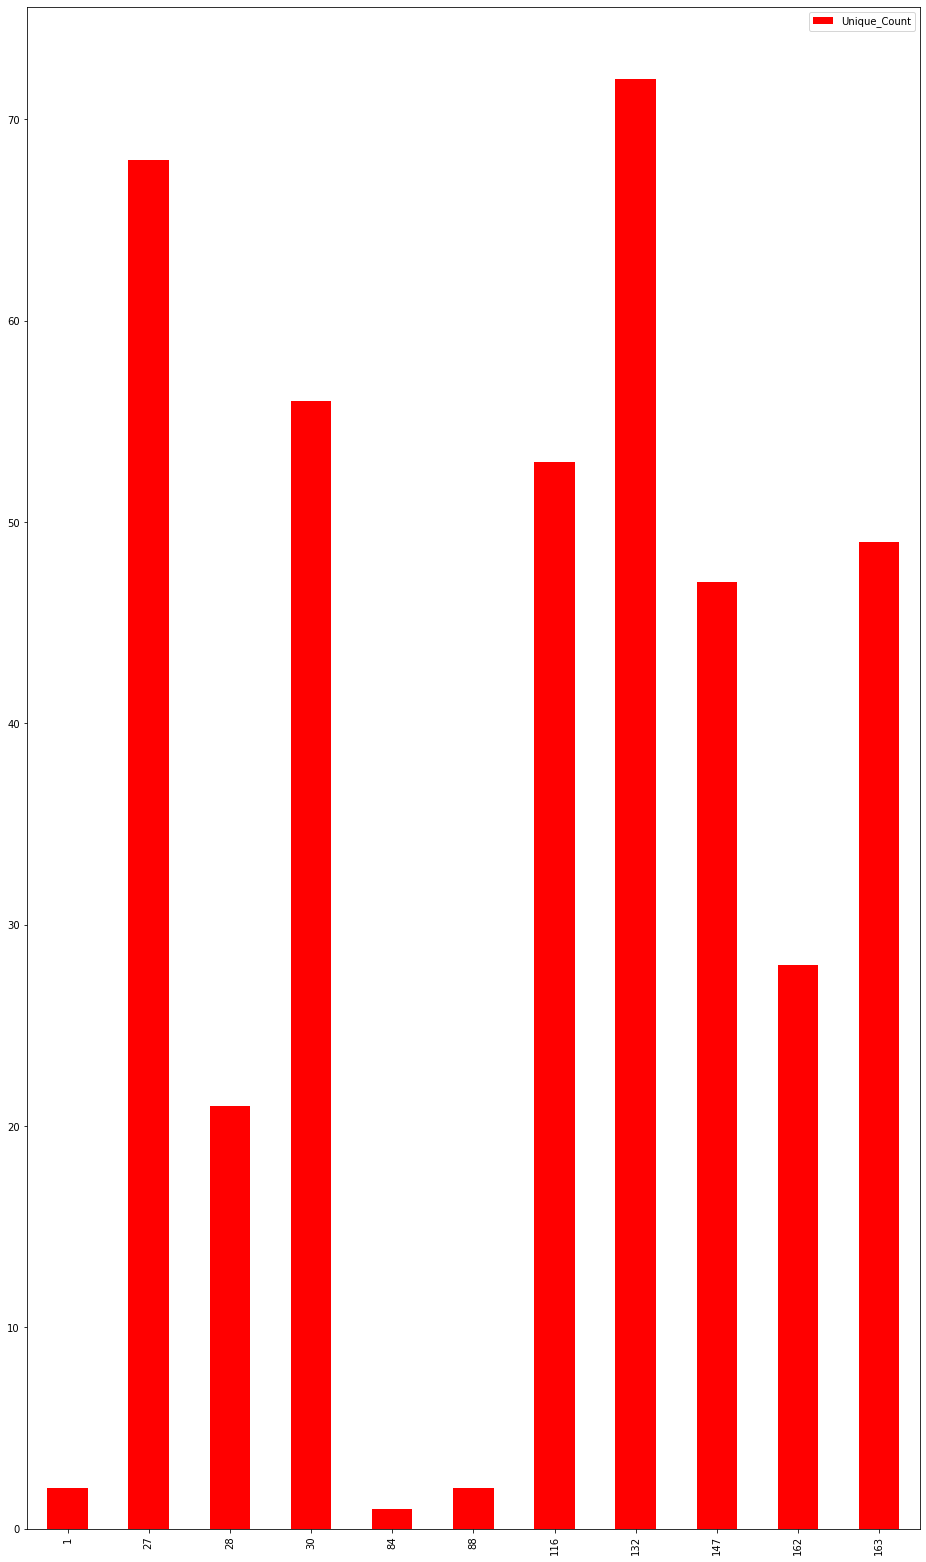

In [23]:
unique_data[unique_data.Unique_Count<=100].plot(kind='bar',color="r")

plot_width, plot_height = (10,10)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [24]:
unique_data[unique_data.Unique_Count<=3]

,Name,Unique_Count
1,target,2
84,sensor54_measure,1
88,sensor58_measure,2


### <font color="blue"> Dropping sensor54_measure, 'sensor58_measure', as it has constant values

In [25]:
df.drop(columns=['sensor54_measure','sensor58_measure',], axis=1, inplace=True)

In [26]:
df.shape

(60000, 162)

In [27]:
df.describe(include="all")

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,30000.500000,0.016667,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,17320.652413,0.128020,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,15000.750000,0.000000,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,30000.500000,0.000000,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,45000.250000,0.000000,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,60000.000000,1.000000,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### <font color="blue">Dropping features having more than 65% of their data points as 0

In [28]:
redundant=[]
print("These features have more than or equal to 65% of their datapoints as 0 which does not contribute much to training :")
for i in df.columns:
    if (df[i]==0).sum()>54000 and i!='target':
        df.drop(i,inplace=True,axis=1)
        redundant.append(i)
        print(i)

These features have more than or equal to 65% of their datapoints as 0 which does not contribute much to training :
sensor5_measure
sensor6_measure
sensor7_histogram_bin0
sensor7_histogram_bin1
sensor7_histogram_bin2
sensor9_measure
sensor11_measure
sensor18_measure
sensor19_measure
sensor20_measure
sensor21_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin9
sensor25_histogram_bin8
sensor25_histogram_bin9
sensor64_histogram_bin0
sensor69_histogram_bin9
sensor76_measure
sensor81_measure
sensor82_measure
sensor85_measure
sensor86_measure
sensor87_measure
sensor88_measure
sensor100_measure
sensor101_measure
sensor106_measure
sensor107_measure


### <font color="blue">Having many zeroes implies that there is less variability among the features.Less variability implies that there isn't much information for the model to learn from the feature.

In [29]:
df.shape

(60000, 130)

###  <font color="blue">Correlation Matrix used to understand relationship between two or more continuous variables

In [30]:
df.corr()

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,...,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9
id,1.000000,-0.012163,-0.008329,0.000468,0.003766,-0.002641,-0.003385,-0.006859,-0.007450,-0.005120,...,-0.003494,-0.008708,-0.010557,-0.009704,-0.009256,-0.005130,-0.004598,0.000300,-0.001446,0.004272
target,-0.012163,1.000000,0.536978,-0.050996,-0.000530,0.433050,0.371622,0.448212,0.368423,0.241901,...,0.415283,0.363679,0.444082,0.429014,0.416195,0.485831,0.415300,0.160284,0.235401,0.115925
sensor1_measure,-0.008329,0.536978,1.000000,-0.063876,-0.001590,0.493749,0.605454,0.778339,0.670841,0.479830,...,0.586513,0.548787,0.732449,0.736321,0.715000,0.724399,0.724102,0.603888,0.469836,0.247149
sensor3_measure,0.000468,-0.050996,-0.063876,1.000000,-0.001765,-0.047927,-0.065078,-0.059478,-0.035125,-0.010495,...,-0.050552,-0.046565,-0.046891,-0.040157,-0.039319,-0.039648,-0.047105,-0.048648,-0.003714,0.013764
sensor4_measure,0.003766,-0.000530,-0.001590,-0.001765,1.000000,-0.000469,-0.000744,-0.001310,-0.001579,-0.001273,...,-0.001065,-0.001177,-0.001527,-0.001529,-0.001494,-0.001239,-0.001201,-0.000801,-0.001235,-0.000716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sensor105_histogram_bin5,-0.005130,0.485831,0.724399,-0.039648,-0.001239,0.612136,0.595195,0.693546,0.613709,0.415134,...,0.533944,0.450977,0.690415,0.722377,0.756831,1.000000,0.702938,0.380114,0.407250,0.190958
sensor105_histogram_bin6,-0.004598,0.415300,0.724102,-0.047105,-0.001201,0.619709,0.686007,0.716956,0.493306,0.309773,...,0.517439,0.375776,0.582977,0.612679,0.607652,0.702938,1.000000,0.546124,0.374332,0.164162
sensor105_histogram_bin7,0.000300,0.160284,0.603888,-0.048648,-0.000801,0.505149,0.736828,0.686658,0.309712,0.158907,...,0.408335,0.296431,0.455031,0.447002,0.437894,0.380114,0.546124,1.000000,0.225378,0.061805
sensor105_histogram_bin8,-0.001446,0.235401,0.469836,-0.003714,-0.001235,0.021448,0.056865,0.331185,0.609496,0.473749,...,0.216694,0.287097,0.454112,0.481672,0.459834,0.407250,0.374332,0.225378,1.000000,0.710167


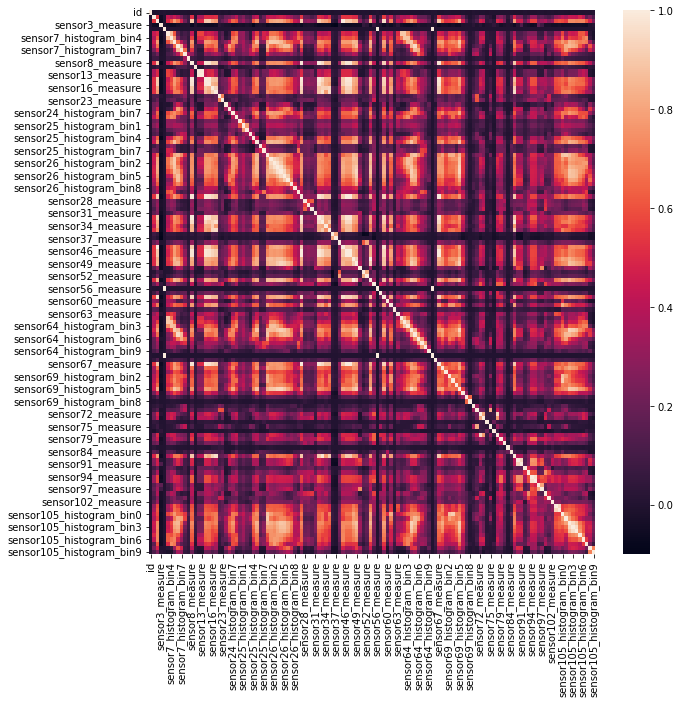

In [31]:
matrix = df.corr() #Methods method = 'spearman'

#Heat Map - Visual representation of the correlation plot
#fig, ax = plt.subplots(figsize = (30, 18))
sns.heatmap(matrix)

plt.show()

plot_width, plot_height = (10,10)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [32]:
# Dropping id feature as it does not affect model performance
df.drop(columns=['id'], axis=1, inplace=True)

In [33]:
#Normalizing the data using MinMaxScaler

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,...,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9
0,0.0,0.027925,9.999998e-01,3.261769e-08,0.000000,0.000163,0.007996,0.038972,0.015907,0.001463,...,0.012881,0.017378,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000
1,0.0,0.012036,0.000000e+00,1.467796e-08,0.000000,0.000080,0.003646,0.018302,0.008157,0.001787,...,0.008862,0.008391,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394
2,0.0,0.014942,1.070067e-07,1.164918e-08,0.000000,0.000007,0.002068,0.020031,0.004624,0.000679,...,0.003494,0.004616,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135
3,0.0,0.000004,3.285295e-08,7.688457e-09,0.000005,0.000010,0.000018,0.000020,0.000000,0.000000,...,0.000076,0.000016,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000
4,0.0,0.022164,6.420405e-07,5.335323e-08,0.000000,0.000191,0.010975,0.019148,0.002078,0.000259,...,0.005398,0.009206,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320


In [34]:
df.shape

(60000, 129)

## <font color="Red"> Model fitting 

In [35]:
scaled_df.head()

,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,...,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9
0,0.0,0.027925,9.999998e-01,3.261769e-08,0.000000,0.000163,0.007996,0.038972,0.015907,0.001463,...,0.012881,0.017378,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000
1,0.0,0.012036,0.000000e+00,1.467796e-08,0.000000,0.000080,0.003646,0.018302,0.008157,0.001787,...,0.008862,0.008391,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394
2,0.0,0.014942,1.070067e-07,1.164918e-08,0.000000,0.000007,0.002068,0.020031,0.004624,0.000679,...,0.003494,0.004616,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135
3,0.0,0.000004,3.285295e-08,7.688457e-09,0.000005,0.000010,0.000018,0.000020,0.000000,0.000000,...,0.000076,0.000016,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000
4,0.0,0.022164,6.420405e-07,5.335323e-08,0.000000,0.000191,0.010975,0.019148,0.002078,0.000259,...,0.005398,0.009206,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320


In [36]:
#Evaluation and HYpertuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

X=scaled_df.drop(['target'],axis=1)
y=scaled_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1000)

In [37]:
X_train.shape

(48000, 128)

In [38]:
X_test.shape

(12000, 128)

In [39]:
y_test.shape

(12000,)

In [40]:
y_train.shape

(48000,)

## <font color="Red"> Model fitting classification algorithms

## <font color="blue"> Logistic Regression

In [41]:
#classification algorithms
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
#Predicting validation set results
y_pred1 = lr.predict(X_test)

## <font color="Red"> Checking f1 score based on validation set results 

In [43]:
f1_score(y_test, y_pred1)

0.5602605863192183

## <font color="blue"> Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=4,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=0)

In [45]:
#Predicting validation set results
y_pred = rf.predict(X_test)

In [46]:
#Checking f1 score based on validation set results
f1_score(y_test, y_pred)

0.7439024390243902

From the results, we see that Random Forest classifier performs the best on our validation set. Hence we will be using this model to predict our test set results

In [47]:
Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
Prediction

,Actual,Predicted
50767,0.0,0.0
2693,0.0,0.0
943,0.0,0.0
29296,0.0,0.0
4605,0.0,0.0
...,...,...
10433,0.0,0.0
34793,0.0,0.0
39606,0.0,0.0
8080,0.0,0.0


## <font color="blue"> Important Variables

In [48]:
# Sort the feature importance in descending order
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [49]:
importances = list(rf.feature_importances_)
feature_list=X_train.columns
d = {'FeatureLabels':feature_list,'Importances':importances} # dictionary data type

df1=pd.DataFrame(d)
df1.sort_values(['Importances'], ascending=False)[:10]



,FeatureLabels,Importances
50,sensor35_measure,0.035264
12,sensor12_measure,0.033189
66,sensor59_measure,0.029957
13,sensor13_measure,0.028038
3,sensor7_histogram_bin3,0.027376
68,sensor61_measure,0.025606
71,sensor64_histogram_bin1,0.023574
17,sensor17_measure,0.023354
55,sensor46_measure,0.023000
0,sensor1_measure,0.022670


## <font color="blue"> prediction on unseen data using RF for important variables

In [50]:
a=scaled_df[['sensor35_measure','sensor61_measure','sensor13_measure','sensor12_measure','sensor17_measure','sensor59_measure','sensor64_histogram_bin1','sensor89_measure','sensor47_measure','sensor45_measure','sensor7_histogram_bin3']]
b=scaled_df['target']

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=0).fit(a, b)

In [53]:
#Predicting validation set results
y_predr = rf2.predict(a)

In [54]:
#Checking f1 score based on validation set results
f1_score(b, y_predr)

0.998998998998999

In [55]:
df1=pd.read_csv('equip_failures_test_set.csv')
df1.head()

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,...,544762,504820,1597028,631494,5644,5448,11096,1982,0,0
1,2,91122,na,na,na,0,0,0,0,0,...,696774,345742,939332,943744,504048,203698,287374,36566,0,0
2,3,218924,na,na,na,na,na,0,280,119070,...,1032974,866000,1645644,1154924,3549128,1550716,15900,0,na,na
3,4,16,0,30,28,0,0,0,0,0,...,70,24,40,12,56,0,0,0,0,0
4,5,39084,na,1054,1032,0,0,0,0,0,...,276304,123720,225722,281462,295244,256146,241074,2372,0,0


In [56]:
new=df1[['sensor35_measure','sensor61_measure','sensor13_measure','sensor12_measure','sensor17_measure','sensor59_measure','sensor64_histogram_bin1','sensor89_measure','sensor47_measure','sensor45_measure','sensor7_histogram_bin3']]
new.head()

,sensor35_measure,sensor61_measure,sensor13_measure,sensor12_measure,sensor17_measure,sensor59_measure,sensor64_histogram_bin1,sensor89_measure,sensor47_measure,sensor45_measure,sensor7_histogram_bin3
0,1026922,621043.2,0,0,1359980,3843046.08,0,77968,4640530,66888.9,0
1,564314,583557.12,0,0,525024,5635891.2,0,47748,6545108,91121.51,0
2,1613280,1113039.36,1351044,804746,1135476,11158955.52,383964,na,na,218924.54,1236386
3,1794,2857.92,0,0,712,3103.68,0,198,32934,15.38,0
4,295666,283138.56,0,0,228912,2111437.44,0,22874,2806880,39083.66,0


In [57]:
new.shape

(16001, 11)

In [58]:
# Replacing string 'na' with NaN values

new = new.replace('na',np.nan)

# Replacing NaN with median values

for col in new.columns:
    if col not in ['id']:
        new[col] = new[col].fillna(new[col].median())

In [59]:
y_pred = rf2.predict(new)

In [60]:
Prediction=pd.DataFrame({'Predicted':y_pred})
Prediction

,Predicted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15996,0.0
15997,0.0
15998,0.0
15999,0.0
